In [1]:
import os
import sys


project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)



import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wandb
from modules.utils import load_runs_final_artifact
from modules.models import TCN_channel, TCN, memory_polynomial_channel
from modules.utils import *
import pandas as pd
import seaborn as sns
import pickle
from matplotlib import cm
from scipy import stats
import zarr




DEVICE = torch.device("cpu")
print("DEVICE", DEVICE)
ENTITY = "dylanbackprops-university-of-washington"
PROJECT = "mldrivenpeled"

DEVICE cpu


In [2]:
# Set plotting variables


plt.rcParams.update({
    'font.size': 8,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'],
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 100,
    'lines.linewidth': 1.0,
    'lines.markersize': 4,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8
    })

In [3]:
models = {
    "48mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-7.6MHz_2.68.V_0.125A_48mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "comfy-sweep-115",
        'encoder_decoder_tcn': "volcanic-galaxy-403",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'eager-grass-413',
        'grid_search':"yqzp2ezq",
        "tcn_validation": "fancy-plant-509",
        "mp_validation": "feasible-violet-510",
        "no_noise_tcn_validation": "copper-wave-644"
    },
    "60mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-9.2MHz_2.775.V_0.129A_60mA_scale2_dynamic_power_0.5-3.zarr", DEVICE),
        'tcn_channel': "happy-sweep-40",
        'encoder_decoder_tcn': "dazzling-wildflower-535",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'easy-yogurt-557',
        'grid_search':"jlwt6o4d",
        "tcn_validation": "stellar-water-768",
        "mp_validation": "proud-bird-769",
        "no_noise_tcn_validation":"northern-terrain-770"
    },
    "80mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-10.8MHz_2.834V_0.135A_80mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "classic-sweep-27",
        'encoder_decoder_tcn': "blooming-disco-648",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'radiant-wood-740',
        'grid_search':"mznst1h2",
        "tcn_validation": "lyric-haze-736",
        "mp_validation": "radiant-wood-740",
        "no_noise_tcn_validation":"radiant-dew-742"
    },
    "121mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-13MHz_2.934V_0.121A_121mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "rural-sweep-18",
        'encoder_decoder_tcn': "gentle-fog-741",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'giddy-fire-743',
        'grid_search':"tghclulb",
        "tcn_validation": "icy-snow-746",
        "mp_validation": "avid-water-751",
        "no_noise_tcn_validation":"happy-sun-757"
    }
}

wide_channel =    {"48mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-20MHz_2.739V_0.125A_47mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "laced-sweep-35",
        'encoder_decoder_tcn': "comfy-terrain-760",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'',
        'grid_search':"zek1s87n",
        "tcn_validation": "comfy-terrain-760",
        "mp_validation": "still-butterfly-761",
        "no_noise_tcn_validation": "winter-mountain-765"
    }}




c:\Users\maild\mldrivenpeled\modules\utils.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location=device)


Loaded from cache!
Loaded from cache!
Loaded from cache!
Loaded from cache!
Loaded from cache!


In [4]:
# Iterate over different current levels and fit memory polynomial models
for current_level, model_info in models.items():
    ofdm_info = model_info['ofdm_info']
    mp_model = memory_polynomial_channel(weights=None, memory_linear=10, memory_nonlinear=10, nonlinearity_order=2, device=torch.device('cpu'))
    _, _ , _ = mp_model.fit(ofdm_info.sent_frames_time, ofdm_info.received_frames_time)
    model_info['memory_polynomial'] = mp_model

Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth


c:\Users\maild\mldrivenpeled\modules\utils.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(local_weights_path, map_location="cpu")


Loading from ../models\channel_models\happy-sweep-40\channel_model_final.pth
Loading from ../models\channel_models\classic-sweep-27\channel_model_final.pth
Loading from ../models\channel_models\rural-sweep-18\channel_model_final.pth


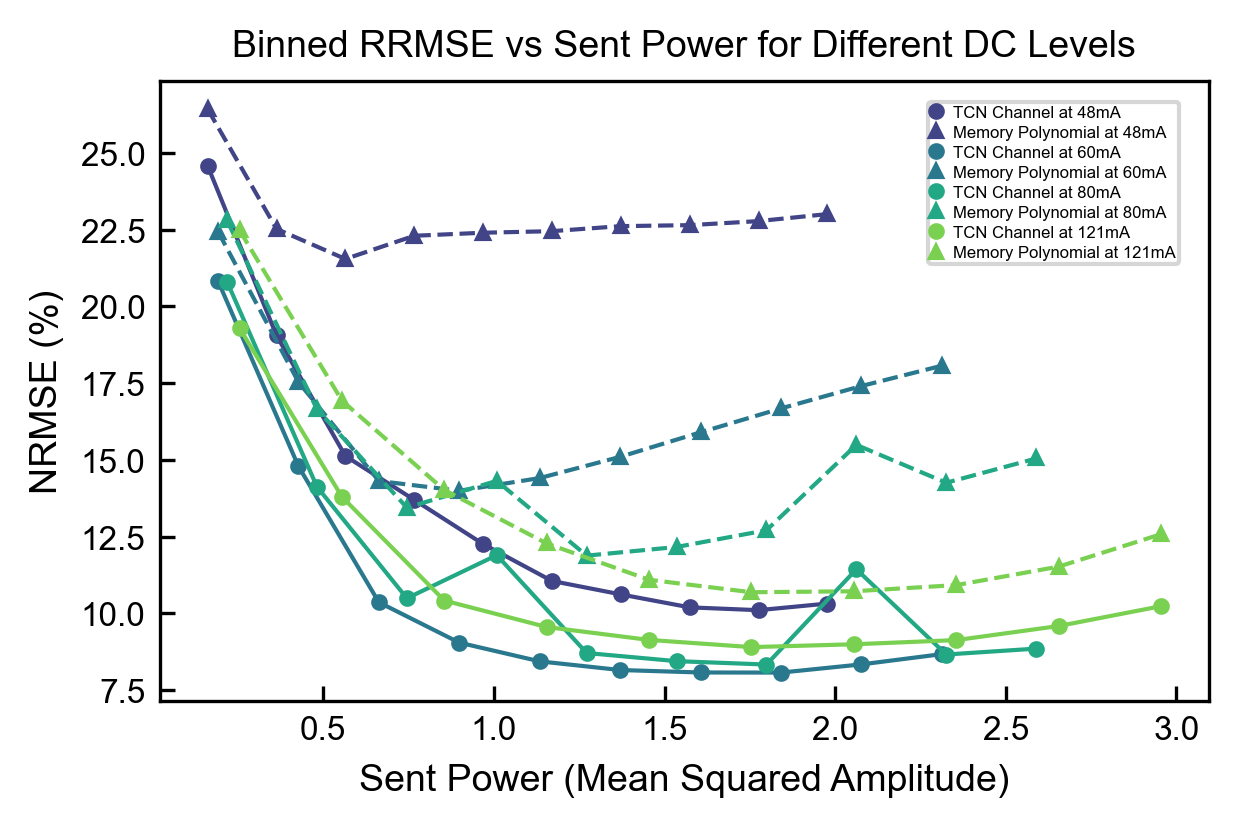

In [5]:
# G2 Plot

plt.rcParams.update({
    'figure.dpi': 300
})

# Create scale of colors for different current levels
current_levels = list(models.keys())
num_levels = len(current_levels)
color_palette = sns.color_palette("viridis", num_levels)

    # Make one large figure with binned NRMSE for each current level
plt.figure(figsize=(4, 2.8))
for current_level, model_info in models.items():
    ofdm_info = model_info['ofdm_info']
    X = ofdm_info.sent_frames_time.to(DEVICE)
    Y = ofdm_info.received_frames_time.to(DEVICE)
    mp_model = model_info['memory_polynomial']
    tcn_model, tcn_cfg = load_runs_final_artifact(model_info['tcn_channel'], DEVICE, model_type='channel')


    # Divide into N power bins and compare NRMSE
    N = 10
    sent_powers = X.square().mean(dim=-1)
    pwr_min = sent_powers.min()
    pwr_max = sent_powers.max()

    bins = torch.linspace(pwr_min, pwr_max, N + 1)
    bin_ids = torch.bucketize(sent_powers, bins)
    binned_losses = torch.zeros(N, 2)
    for i in range(N):
        mask = bin_ids == i
        if mask.any():
            filtered_x = X[mask]
            filtered_y = Y[mask]
            noisy_y_pred, y_pred_tcn, std_y_pred, nu_y_pred = tcn_model(filtered_x)
            tcn_rmse_loss = calculate_rrmse_pct_loss(filtered_y, y_pred_tcn)
            mp_y_pred = mp_model(filtered_x)
            mp_rmse_loss = calculate_rrmse_pct_loss(filtered_y, mp_y_pred)
            binned_losses[i, 0] = tcn_rmse_loss
            binned_losses[i, 1] = mp_rmse_loss
        else:
            binned_losses[i, 0] = torch.nan
            binned_losses[i, 1] = torch.nan

    # Plot binned losses
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.plot(bin_centers.cpu(), binned_losses[:, 0].cpu(), color=color_palette[current_levels.index(current_level)], marker='o', markersize=3, linestyle='-', label=f'TCN Channel at {current_level}')
    plt.plot(bin_centers.cpu(), binned_losses[:, 1].cpu(), color=color_palette[current_levels.index(current_level)], marker='^', markersize=3, linestyle='--', label=f'Memory Polynomial at {current_level}')

plt.title("Binned RRMSE vs Sent Power for Different DC Levels")
plt.xlabel("Sent Power (Mean Squared Amplitude)")
plt.legend(
    fontsize=4,
    handlelength=0.5,
    labelspacing=0.3,
    borderpad=0.2,
    loc="best",
    bbox_to_anchor=(0.98, 0.98)
)
plt.tight_layout()
plt.ylabel("NRMSE (%)")
plt.show()


Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth
Loading from ../models\channel_models\happy-sweep-40\channel_model_final.pth
Loading from ../models\channel_models\classic-sweep-27\channel_model_final.pth
Loading from ../models\channel_models\rural-sweep-18\channel_model_final.pth


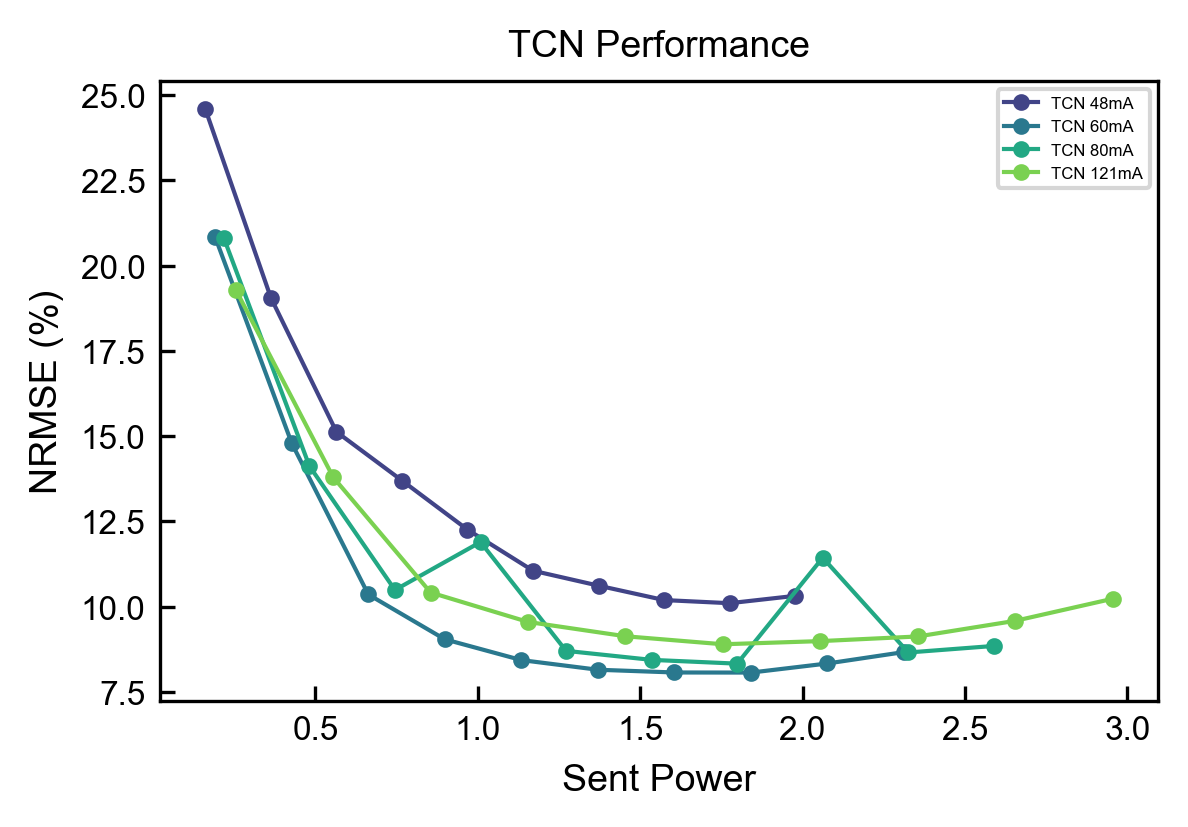

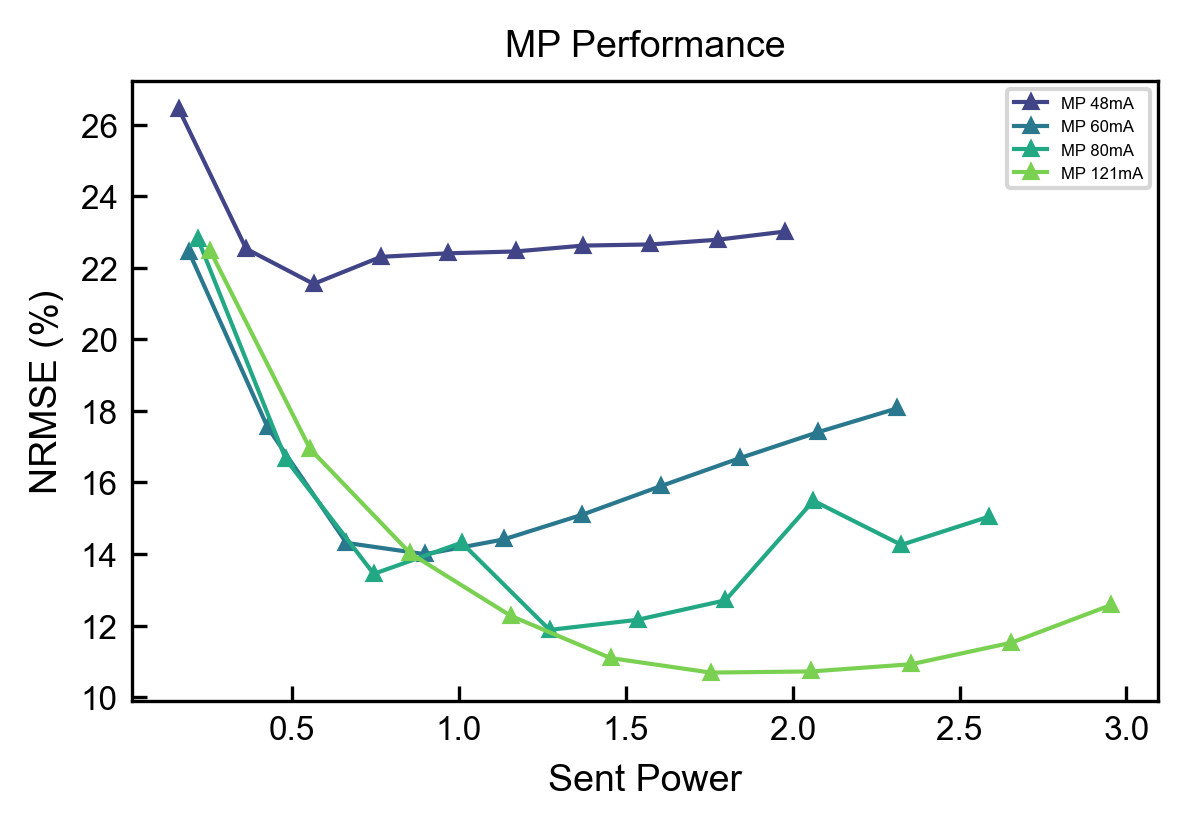

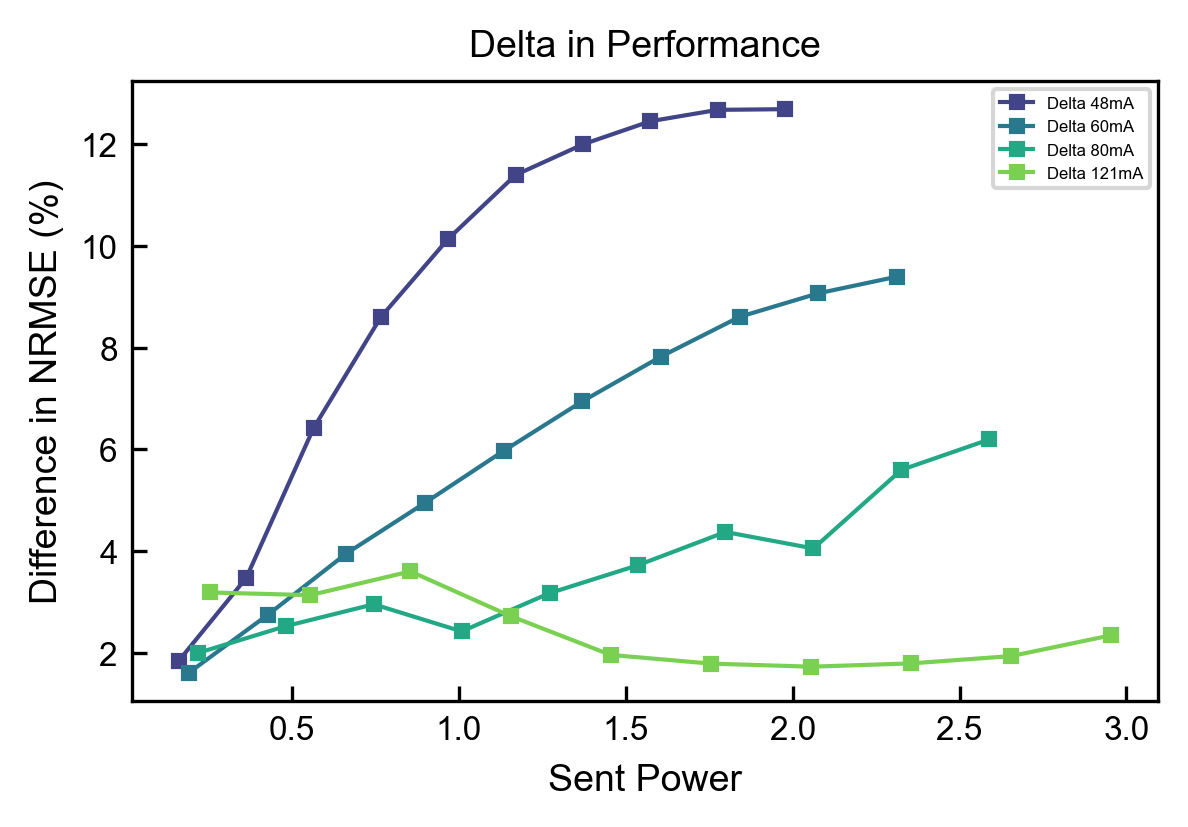

In [6]:
plt.rcParams.update({'figure.dpi': 300})

current_levels = list(models.keys())
num_levels = len(current_levels)
color_palette = sns.color_palette("viridis", num_levels)

all_results = {}
N = 10

for current_level, model_info in models.items():
    ofdm_info = model_info['ofdm_info']
    X = ofdm_info.sent_frames_time.to(DEVICE)
    Y = ofdm_info.received_frames_time.to(DEVICE)
    mp_model = model_info['memory_polynomial']
    tcn_model, tcn_cfg = load_runs_final_artifact(model_info['tcn_channel'], DEVICE, model_type='channel')

    sent_powers = X.square().mean(dim=-1)
    pwr_min, pwr_max = sent_powers.min(), sent_powers.max()
    bins = torch.linspace(pwr_min, pwr_max, N + 1)
    bin_ids = torch.bucketize(sent_powers, bins)
    
    binned_losses = torch.zeros(N, 2)
    for i in range(N):
        mask = bin_ids == i
        if mask.any():
            filtered_x, filtered_y = X[mask], Y[mask]
            _, y_pred_tcn, _, _ = tcn_model(filtered_x)
            mp_y_pred = mp_model(filtered_x)
            binned_losses[i, 0] = calculate_rrmse_pct_loss(filtered_y, y_pred_tcn)
            binned_losses[i, 1] = calculate_rrmse_pct_loss(filtered_y, mp_y_pred)
        else:
            binned_losses[i, :] = torch.nan
            
    all_results[current_level] = {
        'bin_centers': 0.5 * (bins[:-1] + bins[1:]),
        'losses': binned_losses
    }

plt.figure(figsize=(4, 2.8))
for current_level, data in all_results.items():
    plt.plot(data['bin_centers'].cpu(), data['losses'][:, 0].cpu(), color=color_palette[current_levels.index(current_level)], marker='o', markersize=3, label=f'TCN {current_level}')
plt.title("TCN Performance")
plt.xlabel("Sent Power")
plt.ylabel("NRMSE (%)")
plt.legend(fontsize=4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 2.8))
for current_level, data in all_results.items():
    plt.plot(data['bin_centers'].cpu(), data['losses'][:, 1].cpu(), color=color_palette[current_levels.index(current_level)], marker='^', markersize=3, label=f'MP {current_level}')
plt.title("MP Performance")
plt.xlabel("Sent Power")
plt.ylabel("NRMSE (%)")
plt.legend(fontsize=4)
plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 2.8))
for current_level, data in all_results.items():
    delta = data['losses'][:, 1] - data['losses'][:, 0]
    plt.plot(data['bin_centers'].cpu(), delta.cpu(), color=color_palette[current_levels.index(current_level)], marker='s', markersize=3, label=f'Delta {current_level}')
plt.title("Delta in Performance")
plt.xlabel("Sent Power")
plt.ylabel("Difference in NRMSE (%)")
plt.legend(fontsize=4)
plt.tight_layout()
plt.show()

Loading from cache!


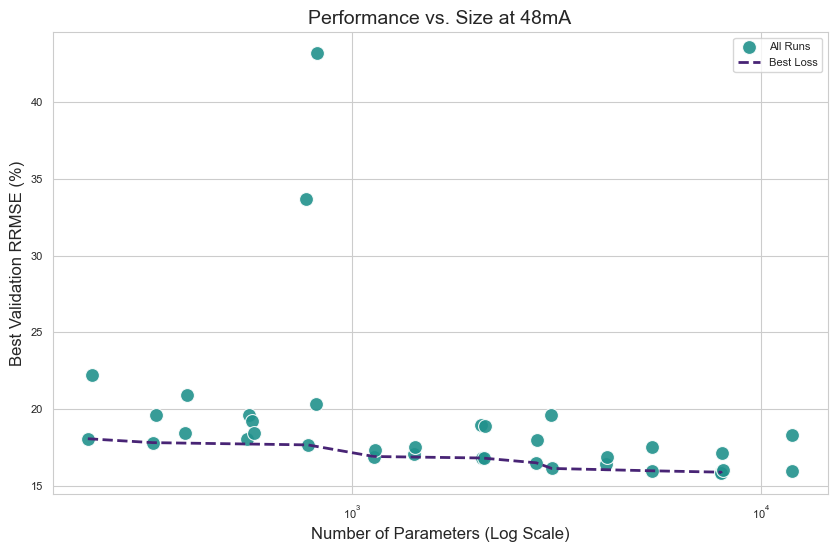

In [7]:
#G4: Get Models for a Sweep and Plot Best Val NMRSE loss vs parameter count

plt.rcParams.update({
    'figure.dpi': 100
})


cmap = plt.get_cmap("viridis")
c_runs  = cmap(0.5)
c_best = cmap(0.1)

def plot_sweep_pareto(sweep_id, entity, project):
    """
    Fetches all runs from a W&B sweep and plots Best Val NRMSE vs Parameter Count.

    Args:
        sweep_id (str): The ID of the sweep.
        entity (str): Your W&B username or team name.
        project (str): The project name.
    """

    # Check if sweep id is cached in plot data
    cache_file = f"cache_{sweep_id}.pkl"
    cache_path = os.path.join(project_root, f"data/plots/{cache_file}")
    if os.path.exists(cache_path):
        print("Loading from cache!")
        with open(cache_path, 'rb') as f:
            sweep_data = pickle.load(f)

    else:
        print("Getting from API")

        api = wandb.Api()

        path = f"{entity}/{project}/{sweep_id}"
        sweep = api.sweep(path)

        # save in pickle file
        os.makedirs(os.path.dirname(cache_path), exist_ok=True)
        sweep_data = []

        for run in sweep.runs:
            # Skip failed/crashed runs
            if run.state != "finished":
                continue
            num_params = run.config.get('num_params')

            val_nrmse = run.summary.get('avg_nrmse_pct_loss')

            sweep_data.append({
                "params": num_params,
                "nrmse_pct": val_nrmse,
                "run_name": run.name
            })

        with open(cache_path, 'wb') as f:
            pickle.dump(sweep_data, f)

    df = pd.DataFrame(sweep_data)

    df = df.sort_values("params")

    pareto_points = []
    current_min_error = float('inf')

    for _, row in df.iterrows():
        if row['nrmse_pct'] < current_min_error:
            pareto_points.append(row)
            current_min_error = row['nrmse_pct']

    pareto_df = pd.DataFrame(pareto_points)

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    # Scatter all runs
    sns.scatterplot(
        data=df,
        x='params',
        y='nrmse_pct',
        s=100,
        alpha=0.9,
        color=c_runs,
        label='All Runs'
    )

    # Draw Pareto Line
    plt.plot(
        pareto_df['params'],
        pareto_df['nrmse_pct'],
        linestyle='--',
        linewidth=2,
        label='Best Loss',
        color=c_best
    )

    plt.xscale('log')
    plt.xlabel('Number of Parameters (Log Scale)', fontsize=12)
    plt.ylabel('Best Validation RRMSE (%)', fontsize=12)
    plt.title(f'Performance vs. Size at {DC_BIAS}', fontsize=14)
    plt.legend(loc='upper right')


    plt.show()

DC_BIAS = '48mA'

SWEEP_ID = wide_channel[DC_BIAS]['grid_search']

plot_sweep_pareto(SWEEP_ID, entity=ENTITY, project=PROJECT)

Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames
Skipped 0 corrupted frames


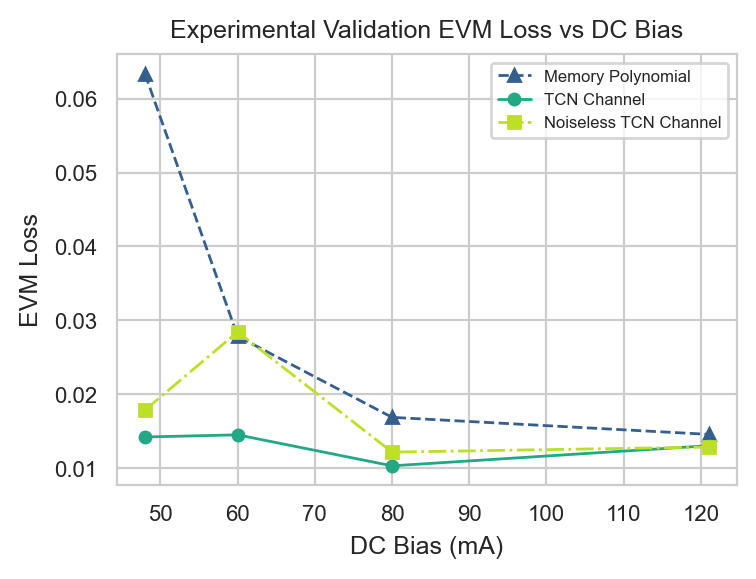

In [8]:
# Analyze Experimental Validation Data

root_val_path = os.path.join(project_root, "data/validation_measurements")
dc_offsets= [int(bias[:-2]) for bias in models.keys()]
tcn_evms = []
mp_evms = []
no_noise_tcn_evms = []


plt.rcParams.update({
    'figure.dpi': 200
})




cmap = plt.get_cmap("viridis")
c_mp  = cmap(0.3)
c_tcn = cmap(0.6)
c_noiseless = cmap(0.9)

for dc_bias in models.keys():
    vals = ['mp_validation', 'tcn_validation', 'no_noise_tcn_validation']
    for val in vals:
        ofdm_info = models[dc_bias]['ofdm_info']
        validation_file_name = models[dc_bias][val]
        data_path = os.path.join(root_val_path, f"{validation_file_name}.zarr")

        root = zarr.open(data_path, mode="r")

        time_encoder_in = []
        time_encoder_out = []
        time_decoder_in = []
        time_decoder_out = []
        evm_values = []
        ber_values = []
        num_skipped = 0
        for frame_key in root.group_keys():
            try:
                frame = root[frame_key]
                time_encoder_in.append(torch.tensor(frame["time_encoder_in"][:], dtype=torch.float32))
                time_encoder_out.append(torch.tensor(frame["time_encoder_out"][:], dtype=torch.float32))
                time_decoder_in.append(torch.tensor(frame["time_decoder_in"][:], dtype=torch.float32))
                time_decoder_out.append(torch.tensor(frame["time_decoder_out"][:], dtype=torch.float32))
                evm_values.append(frame.attrs['EVM'])
                ber_values.append(frame.attrs['BER'])
            except Exception as e:
                num_skipped += 1
                print(f"Skipping corrupted frame {frame_key}: {e}")
                pass # skip corrupted frames
        print(f"Skipped {num_skipped} corrupted frames")

        time_encoder_in = torch.stack(time_encoder_in).to(DEVICE)
        time_encoder_out = torch.stack(time_encoder_out).to(DEVICE)
        time_decoder_in = torch.stack(time_decoder_in).to(DEVICE)
        time_decoder_out = torch.stack(time_decoder_out).to(DEVICE)
        evm_values = torch.tensor(evm_values, dtype=torch.float32).to(DEVICE)
        ber_values = torch.tensor(ber_values, dtype=torch.float32).to(DEVICE)

        # # calculate NRMSE for interpretability
        # rrmse = calculate_rrmse_pct_loss(time_encoder_in, time_decoder_out)
        if 'tcn_validation' == val:
            tcn_evms.append(evm_values.mean().item())
        elif 'mp_validation' == val:
            mp_evms.append(evm_values.mean().item())
        elif 'no_noise_tcn_validation' == val:
            no_noise_tcn_evms.append(evm_values.mean().item())

plt.figure(figsize=(4,2.8))
plt.plot(dc_offsets, mp_evms, marker='^', linestyle='--', color=c_mp, label='Memory Polynomial')
plt.plot(dc_offsets, tcn_evms, marker='o', linestyle='-', color=c_tcn, label='TCN Channel')
plt.plot(dc_offsets, no_noise_tcn_evms, marker='s', linestyle='-.', color=c_noiseless, label='Noiseless TCN Channel')
plt.title("Experimental Validation EVM Loss vs DC Bias")
plt.xlabel("DC Bias (mA)")
plt.ylabel("EVM Loss")
plt.legend(fontsize=6)
plt.show()

Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth
Is model Gaussian? False
Mean Nu Prediction at power 0.50: 7.0277 Max Nu Prediction: 17.0979 Min Nu Prediction: 2.0000                 Mean Std Prediction: 0.0063 | Max Std Prediction: 0.0233 Min Std Prediction: 0.0012


c:\Users\maild\mldrivenpeled\modules\utils.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(local_weights_path, map_location="cpu")


Mean Nu Prediction at power 0.78: 6.5905 Max Nu Prediction: 17.6353 Min Nu Prediction: 2.0000                 Mean Std Prediction: 0.0063 | Max Std Prediction: 0.0292 Min Std Prediction: 0.0011
Mean Nu Prediction at power 1.06: 6.2012 Max Nu Prediction: 19.2886 Min Nu Prediction: 2.0000                 Mean Std Prediction: 0.0063 | Max Std Prediction: 0.0436 Min Std Prediction: 0.0008
Mean Nu Prediction at power 1.33: 5.8549 Max Nu Prediction: 18.4781 Min Nu Prediction: 2.0000                 Mean Std Prediction: 0.0063 | Max Std Prediction: 0.0448 Min Std Prediction: 0.0006
Mean Nu Prediction at power 1.61: 5.5535 Max Nu Prediction: 19.5953 Min Nu Prediction: 2.0000                 Mean Std Prediction: 0.0063 | Max Std Prediction: 0.0552 Min Std Prediction: 0.0005
Mean Nu Prediction at power 1.89: 5.2858 Max Nu Prediction: 19.4227 Min Nu Prediction: 2.0000                 Mean Std Prediction: 0.0062 | Max Std Prediction: 0.0627 Min Std Prediction: 0.0004
Mean Nu Prediction at power 2.

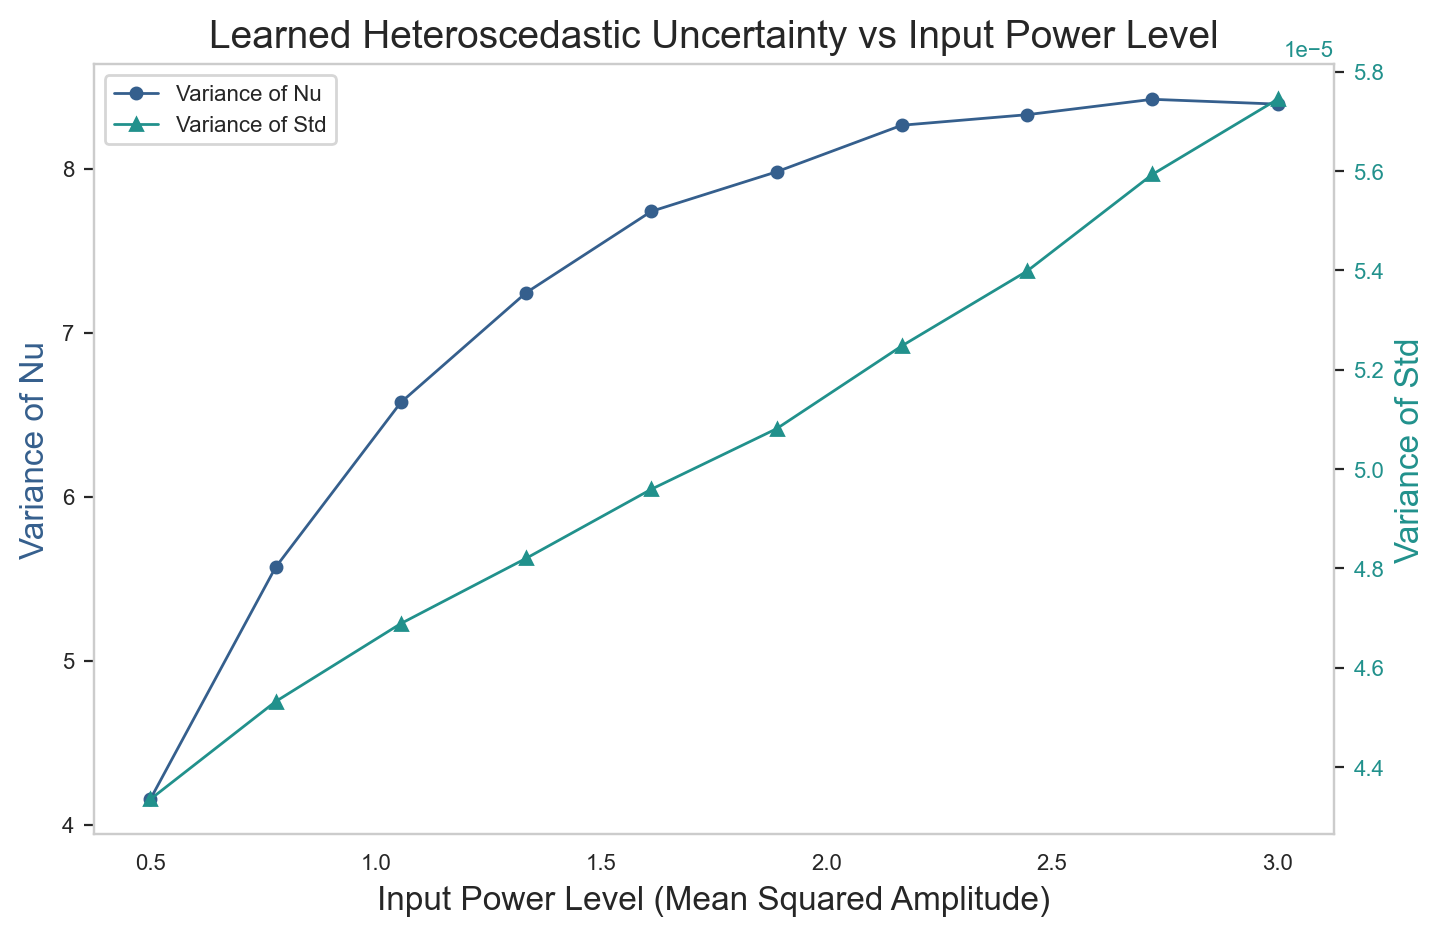

In [9]:
plt.rcParams.update({
    'figure.dpi': 200
})


tcn, _ = load_runs_final_artifact(models['48mA']['tcn_channel'], DEVICE, model_type='channel')

print(f"Is model Gaussian? {tcn.gaussian}")
fig, ax1 = plt.subplots(figsize=(8, 5))

power_levels = torch.linspace(0.5, 3.0, steps=10)
nu_variances = []
std_variances = []

with torch.no_grad():
    for power in power_levels:
        input_signal = torch.randn(1000, 1000).to(DEVICE) * torch.sqrt(power)
        noisy_y_pred, y_pred_tcn, std_y_pred, nu_y_pred = tcn(input_signal)


        # Trim by 2x receptive field to avoid edge effects
        receptive_field = tcn.receptive_field
        nu_y_pred = nu_y_pred[:, receptive_field:]
        std_y_pred = std_y_pred[:, receptive_field:]

        print(f"Mean Nu Prediction at power {power.item():.2f}: {nu_y_pred.mean().item():.4f} Max Nu Prediction: {nu_y_pred.max().item():.4f} Min Nu Prediction: {nu_y_pred.min().item():.4f} \
                Mean Std Prediction: {std_y_pred.mean().item():.4f} | Max Std Prediction: {std_y_pred.max().item():.4f} Min Std Prediction: {std_y_pred.min().item():.4f}")
        var_nu_y_pred = torch.var(nu_y_pred, dim=1).mean(dim=0).cpu().item()
        var_std_y_pred = torch.mean(std_y_pred**2, dim=1).mean(dim=0).cpu().item()
        nu_variances.append(var_nu_y_pred)
        std_variances.append(var_std_y_pred)

cmap = plt.get_cmap("viridis")
c_nu  = cmap(0.3)
c_std = cmap(0.5)

line1, = ax1.plot(power_levels.cpu(), nu_variances, marker='o',
                  label='Variance of Nu', color=c_nu)
ax1.set_ylabel('Variance of Nu', fontsize=12, color=c_nu)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
line2, = ax2.plot(power_levels.cpu(), std_variances, marker='^',
                  label='Variance of Std', color=c_std)
ax2.set_ylabel('Variance of Std', fontsize=12, color=c_std)
ax2.tick_params(axis='y', labelcolor=c_std)
plt.legend(handles=[line1, line2], loc="upper left")
plt.title('Learned Heteroscedastic Uncertainty vs Input Power Level', fontsize=14)
ax1.grid(False)
ax2.grid(False)
ax1.set_xlabel('Input Power Level (Mean Squared Amplitude)', fontsize=12)
plt.show()

Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth


c:\Users\maild\mldrivenpeled\modules\utils.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(local_weights_path, map_location="cpu")


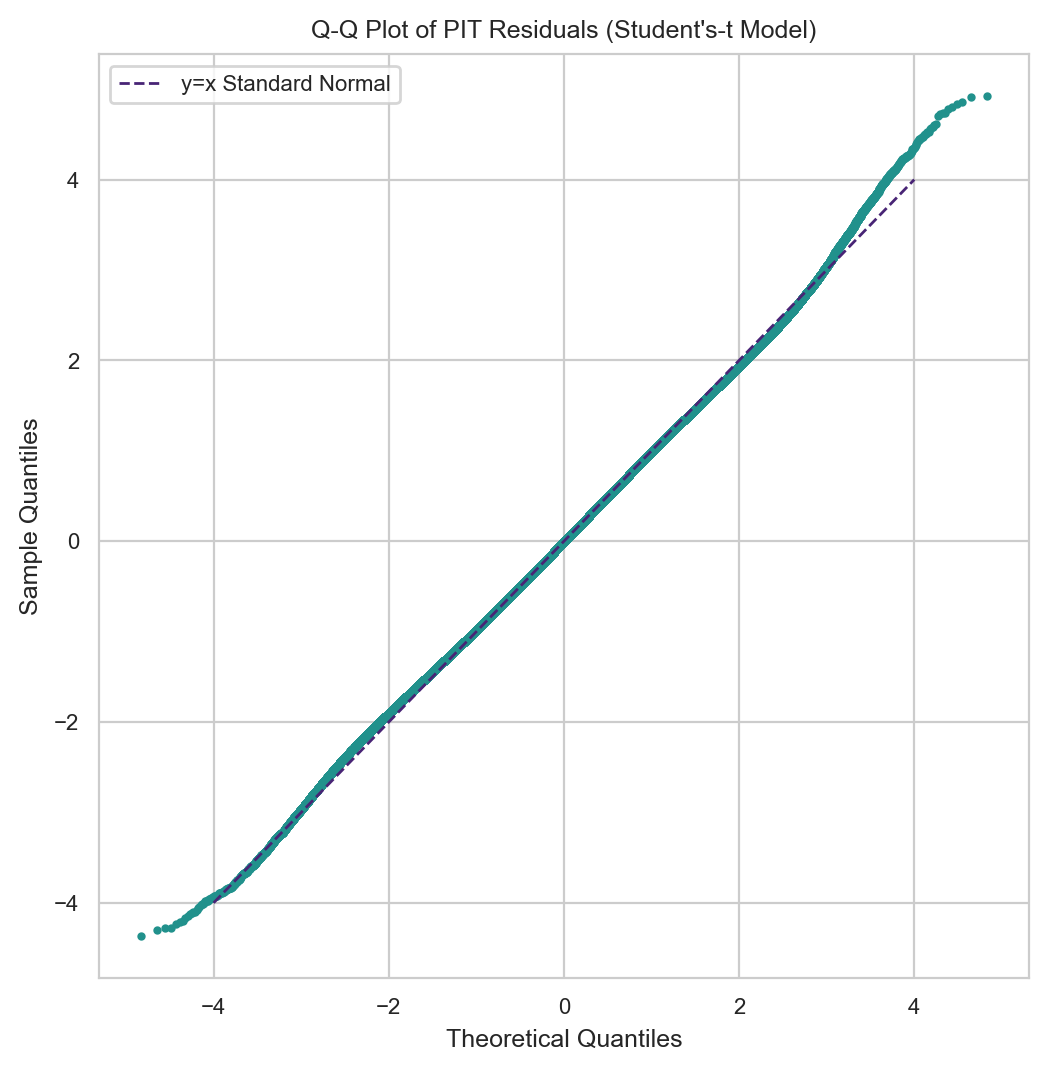

In [12]:
# G3: Visualize Learned Probability Distribution with Q-Q plot
plt.rcParams.update({
    'figure.dpi': 200,
})

tcn, _ = load_runs_final_artifact(models['48mA']['tcn_channel'], DEVICE, model_type='channel')
ofdm_info = models['48mA']['ofdm_info']

# If model is Gaussian, plot Q-Q plot of residuals. Otherwise, for the Student's-t
# model, we need to do a probability integral transform to get to a Gaussian using the CDF


X, Y = ofdm_info.sent_frames_time, ofdm_info.received_frames_time
y_pred_noisy, y_pred_mean, y_pred_std, y_pred_nu = tcn(X)

# collect residuals
r = (Y - y_pred_mean) / y_pred_std

# trim by receptive field
r = r[:, tcn.receptive_field:].detach().cpu().numpy().flatten()

# truncate to smaller amount for computational feasibility
N = r.shape[0]
MAX_SAMPLES = 1000000
indices = torch.randperm(N)[:MAX_SAMPLES]
r = r[indices]
if tcn.gaussian:
    (osm, osr), _ = stats.probplot(r, dist="norm")
    plt.figure(figsize=(6, 6))
    plt.plot(osm, osr, marker='.', linestyle='none', color=cmap(0.5))
    plt.plot([-4, 4], [-4, 4], color=cmap(0.1), linestyle='--', label='y=x Standard Normal')
    plt.title("Q-Q Plot of Residuals (Gaussian Model)")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    # For Student's-t, do probability integral transform
    nu = y_pred_nu[:, tcn.receptive_field:].detach().cpu().numpy().flatten()
    nu = nu[indices]
    cdf_values = stats.t.cdf(r, df=nu)
    transformed_residuals = stats.norm.ppf(cdf_values) # Transform to standard normal using inverse CDF of normal
    (osm, osr), _ = stats.probplot(transformed_residuals, dist="norm")
    plt.figure(figsize=(6, 6))
    plt.plot(osm, osr, marker='.', linestyle='none', color=cmap(0.5))
    plt.plot([-4, 4], [-4, 4], color=cmap(0.1), linestyle='--', label='y=x Standard Normal')
    plt.title("Q-Q Plot of PIT Residuals (Student's-t Model)")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.legend()
    plt.show()